In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
import pandas as pd, numpy as np

In [64]:
#importing the data set
Lead_Score=pd.read_csv("Leads.csv",low_memory=False )
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [65]:
Lead_Score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [66]:
Lead_Score.shape

(9240, 37)

In [67]:
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [68]:
Lead_Score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [69]:
Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [70]:
Lead_Score.drop(columns=['Lead Number'], axis=1, inplace=True)

In [71]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [72]:
pd.set_option('display.max_columns', None)
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [73]:
Lead_Score['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [74]:
Lead_Score.drop(columns=['Get updates on DM Content'], axis=1, inplace=True)

In [75]:
Lead_Score=Lead_Score.replace('Select', np.nan)

In [76]:
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [77]:
Lead_Score = Lead_Score.drop(Lead_Score.loc[:,list(round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)), 2)>70)].columns, 1)

In [78]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [79]:
Lead_Score.shape

(9240, 33)

# **Treating Missing Value**

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


In [81]:
Lead_Score['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Might be'),
  Text(2, 0, 'Not Sure'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

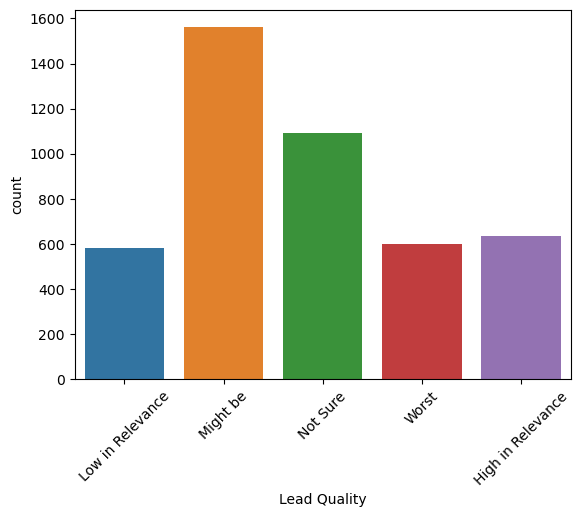

In [82]:
sns.countplot(Lead_Score['Lead Quality'])
plt.xticks(rotation=45)

In [83]:
Lead_Score['Lead Quality'] = Lead_Score['Lead Quality'].replace(np.nan, 'Not Sure')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

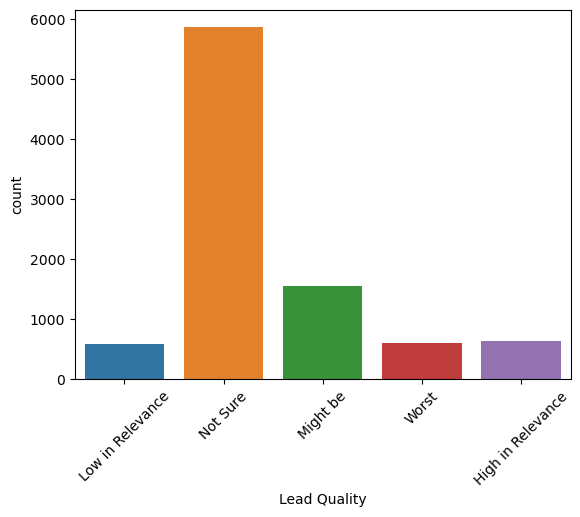

In [84]:
sns.countplot(Lead_Score['Lead Quality'])
plt.xticks(rotation=45)

In [85]:
Lead_Score['Lead Origin'].describe()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

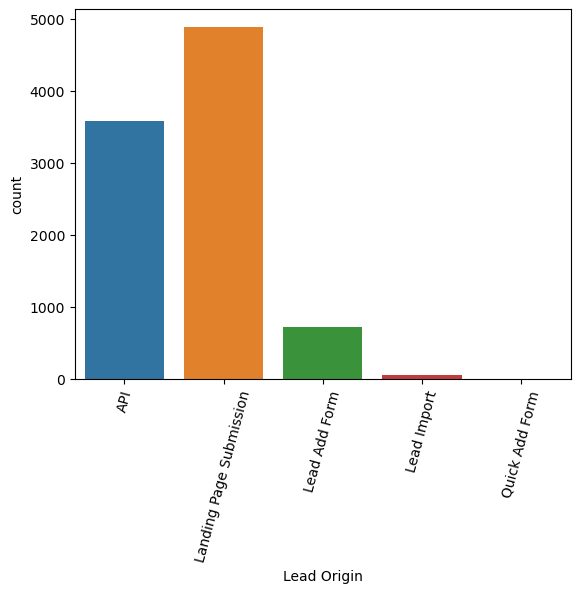

In [86]:
sns.countplot(Lead_Score['Lead Origin'])
plt.xticks(rotation=75)

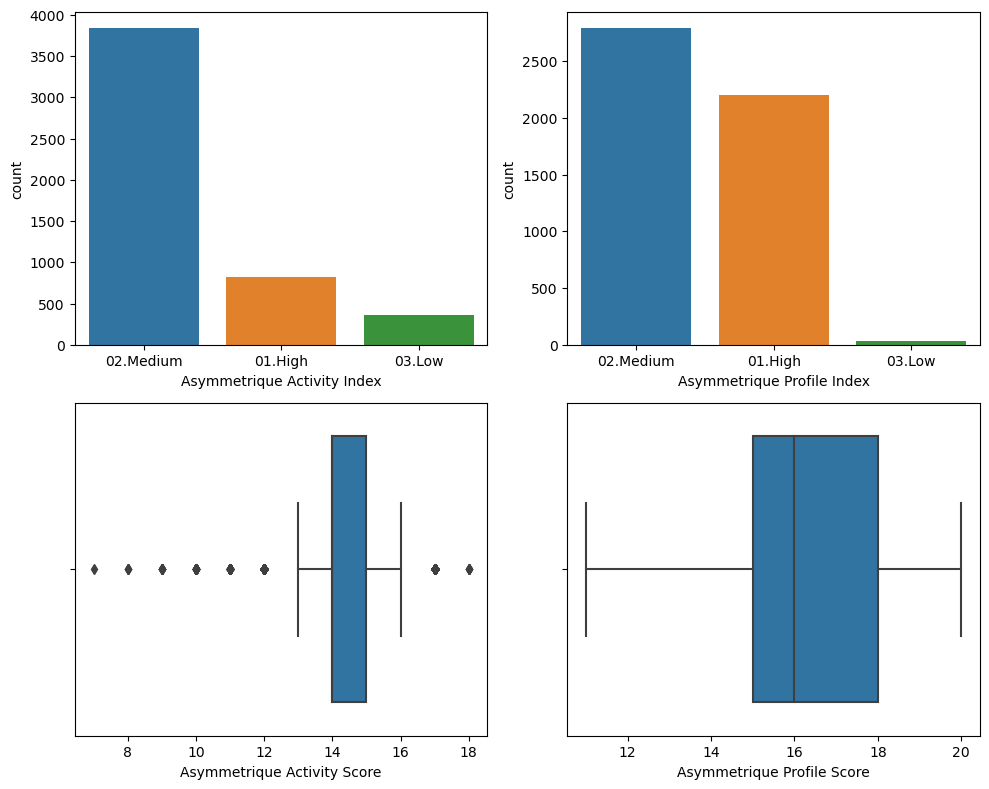

In [87]:
fig, axis=plt.subplots(2,2, figsize=(10,8))
plot1=sns.countplot(Lead_Score[ 'Asymmetrique Activity Index'],ax=axis[0,0])
plot2=sns.countplot(Lead_Score[ 'Asymmetrique Profile Index'],ax=axis[0,1]) 
plot3=sns.boxplot(Lead_Score['Asymmetrique Activity Score'],ax=axis[1,0]) 
plot4=sns.boxplot(Lead_Score['Asymmetrique Profile Score'],ax=axis[1,1])
plt.tight_layout()

In [88]:
Lead_Score[['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


In [89]:
Lead_Score[['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].isnull().sum()

Asymmetrique Activity Index    4218
Asymmetrique Profile Index     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

More than 45% null values in the above columns therefore we drop it

In [90]:
Lead_Score=Lead_Score.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [91]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,Mumbai,No,No,Modified


In [92]:
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)))

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [93]:
Lead_Score.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [94]:
Lead_Score.City.isnull().sum()

3669

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

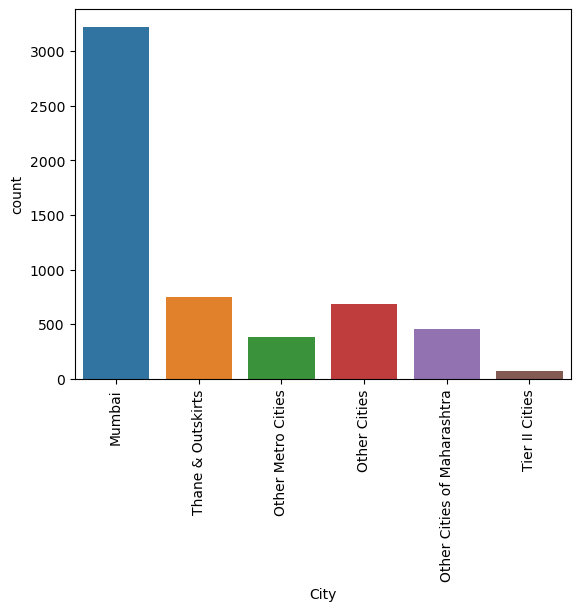

In [95]:
sns.countplot(Lead_Score.City)
plt.xticks(rotation=90)

In [96]:
#More than 50% of the traffic is from mumbai
Lead_Score['City']=Lead_Score['City'].replace(np.nan,'Mumbai')

In [97]:
Lead_Score.City.isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

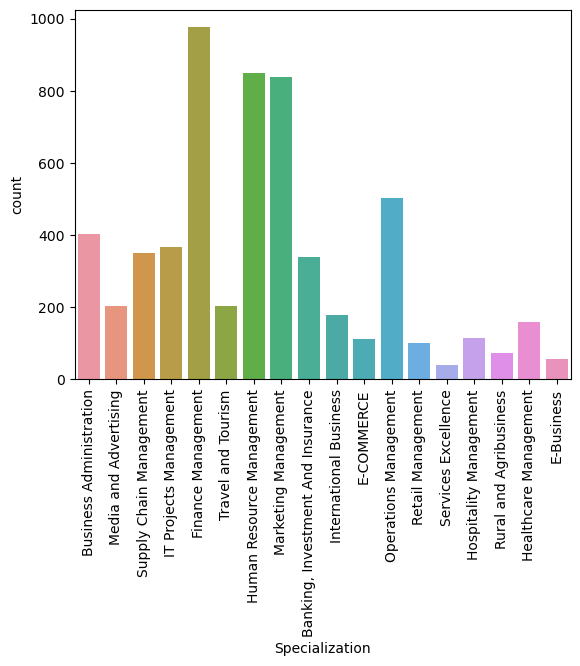

In [98]:
sns.countplot(Lead_Score.Specialization)
plt.xticks(rotation=90)

In [99]:
Lead_Score['Specialization']=Lead_Score['Specialization'].replace(np.nan,'others')

In [100]:
Lead_Score.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

[]

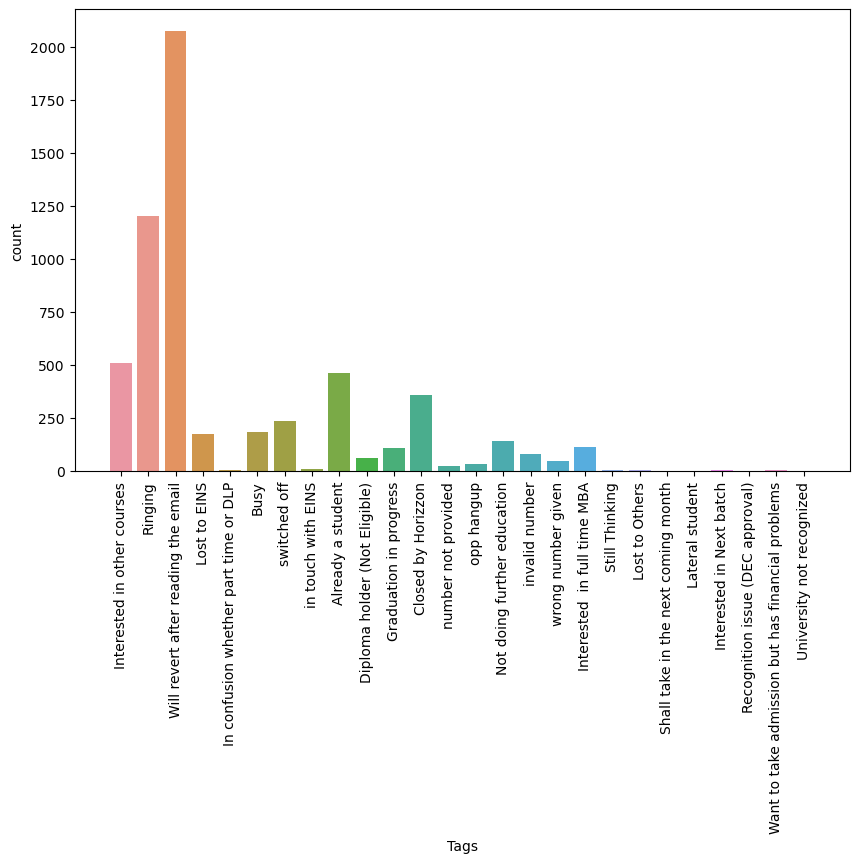

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(Lead_Score.Tags)
plt.xticks(rotation=90)
plt.plot()

In [102]:
Lead_Score['Tags']=Lead_Score['Tags'].replace(np.nan,'Will revert after reading the email')

[]

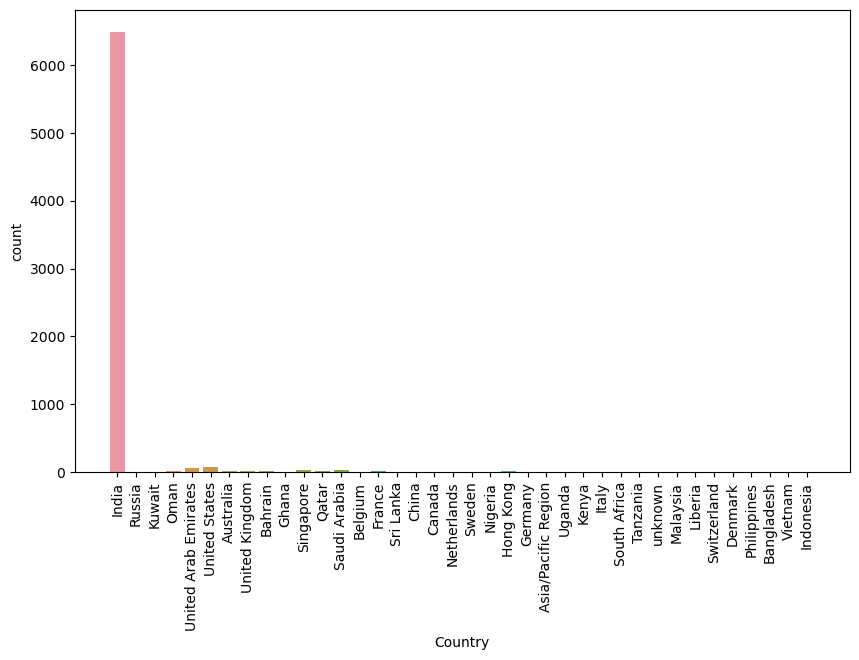

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(Lead_Score.Country)
plt.xticks(rotation=90)
plt.plot()

In [104]:
Lead_Score['Country'].isnull().sum()

2461

In [105]:
Lead_Score['Country']=Lead_Score['Country'].replace(np.nan,'India')

In [106]:
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)))

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                           0.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

[]

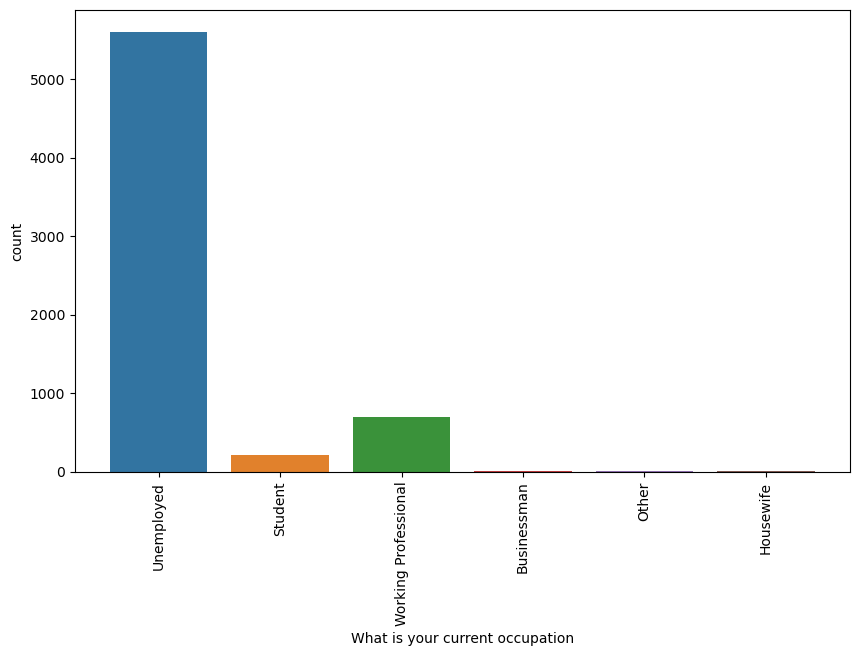

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(Lead_Score['What is your current occupation'])
plt.xticks(rotation=90)
plt.plot()

In [108]:
Lead_Score['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [109]:
Lead_Score['What is your current occupation']=Lead_Score['What is your current occupation'].replace(np.nan,'Unemployed')

[]

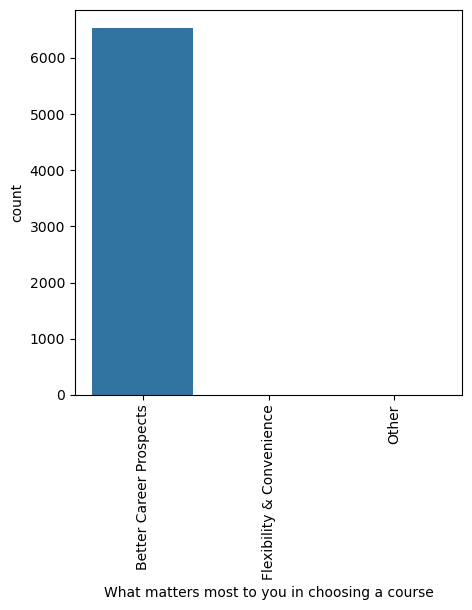

In [110]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(Lead_Score['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.plot()

In [111]:
Lead_Score['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [112]:
Lead_Score['What matters most to you in choosing a course']=Lead_Score['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [113]:
Lead_Score.dropna(inplace=True)

In [114]:
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)))

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

# **EDA**

In [115]:
Conversion_Percent=sum(Lead_Score['Converted'])/len(Lead_Score['Converted'])*100
Conversion_Percent

37.85541106458012

[]

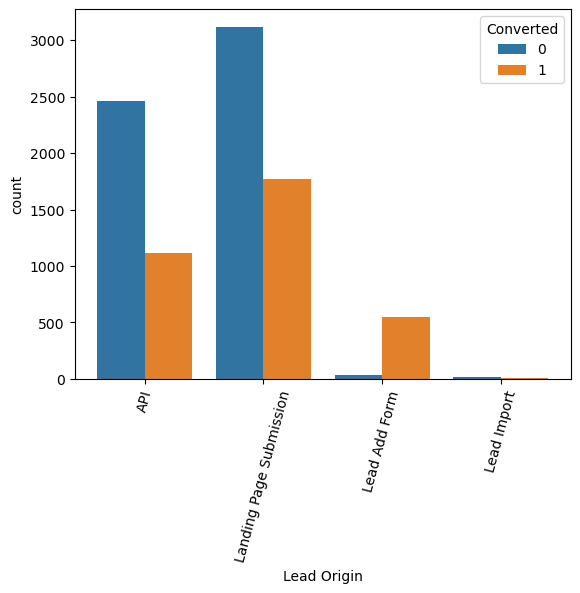

In [116]:
sns.countplot(x='Lead Origin',hue='Converted', data=Lead_Score)
plt.xticks(rotation=75)
plt.plot()

1. Landing page submission and API are higher in number but thelead conversion rate is quite low(30-35%).
2. Lead Add Form are low in number but the conversion rate of the leads are as high as 90%.
3. Lead Import are very very low in number not much important.

**Conclusion:** We need to focus on how we can improve the conversion rtae of API and Landing Page Submission in order to attain a high conversion rate.


[]

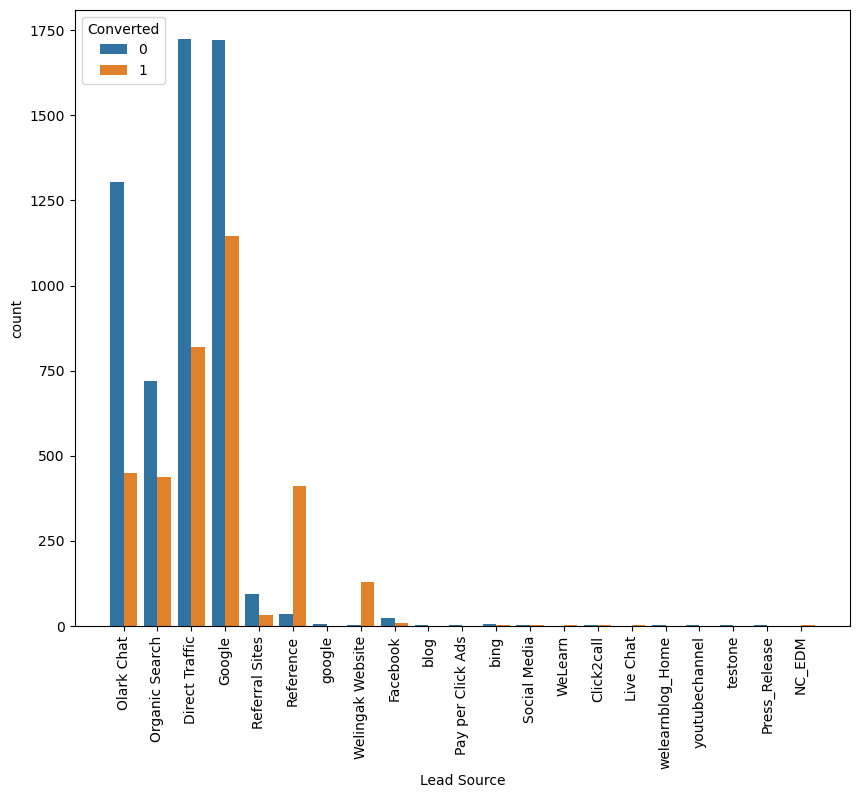

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Lead Source',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

In [118]:
Lead_Score['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [119]:
Lead_Score['Lead Source']=Lead_Score['Lead Source'].replace(['google'],'Google')
Lead_Score['Lead Source']=Lead_Score['Lead Source'].replace(['Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media','WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home','youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],'Other_Sources')

[]

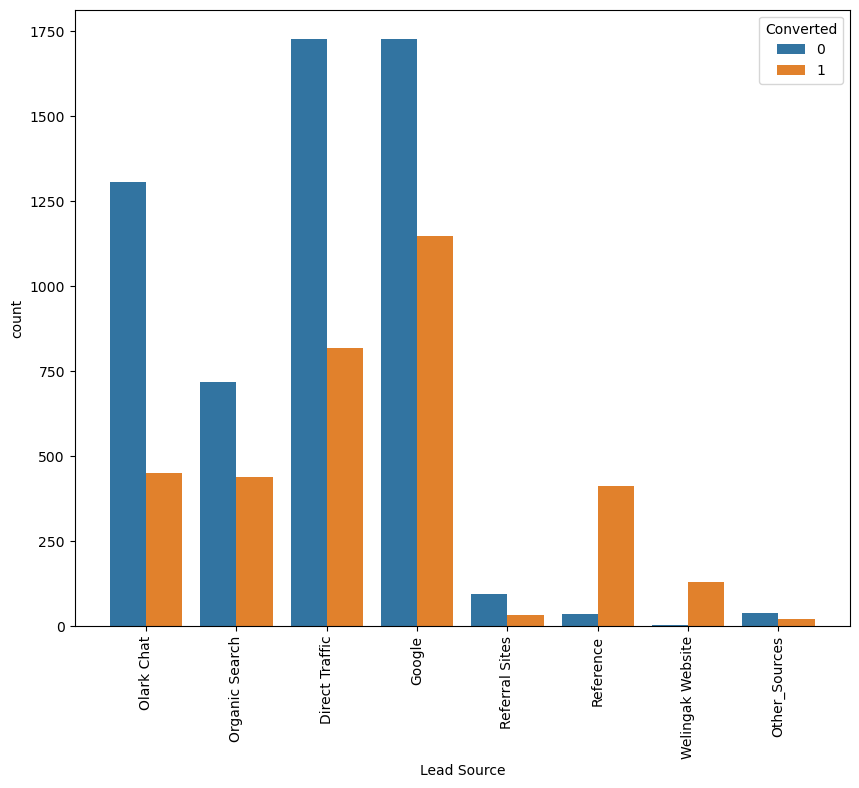

In [120]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Lead Source',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

Lead Source
1. Most of the Leads are coming from Olark Chat, Directly and with Google Search, Organic Search.
2. Conversion rate of Reference and wellingak Website are high than other Sources.

Conclusion: To improve the conversion rate We should Focus on improving the process of lead conversionfrom Olark Chat, Google Search, Direct Traffic, Organic Search. Also, we should try to generate more leads from reference and wellingak Website.

[]

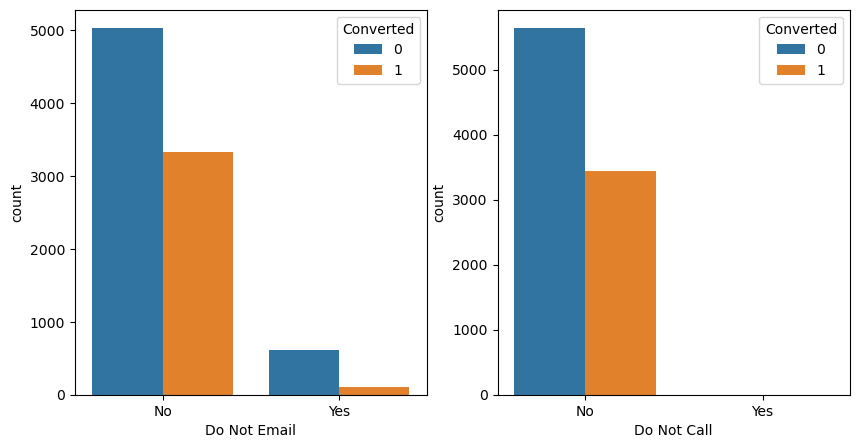

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='Do Not Email',hue='Converted', data=Lead_Score, ax=axs[0])
sns.countplot(x='Do Not Call',hue='Converted', data=Lead_Score, ax=axs[1])
plt.plot()

In [122]:
Lead_Score['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:>

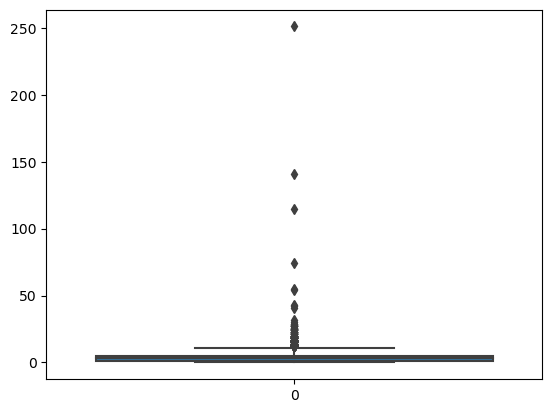

In [123]:
sns.boxplot(data=Lead_Score['TotalVisits'])

In [124]:
Percentile=Lead_Score['TotalVisits'].quantile([0.05,0.95]).values

In [125]:
#As there are outliers in Total visit we will cap from 5 to 95 percentile where most of the data points lies
Lead_Score['TotalVisits'][Lead_Score['TotalVisits']<=Percentile[0]]=Percentile[0]
Lead_Score['TotalVisits'][Lead_Score['TotalVisits']>=Percentile[1]]=Percentile[1]

print(Percentile[0],",",Percentile[1])

0.0 , 10.0


<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

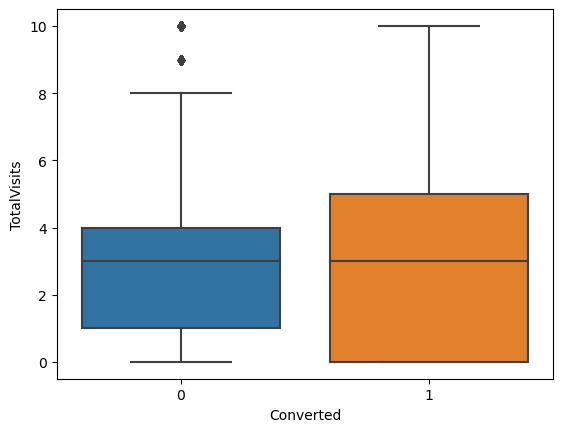

In [126]:
sns.boxplot(y='TotalVisits',x='Converted', data=Lead_Score )

Conclusion: Total Visit are not of much importance as the median of both converted and not converted lies equal.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

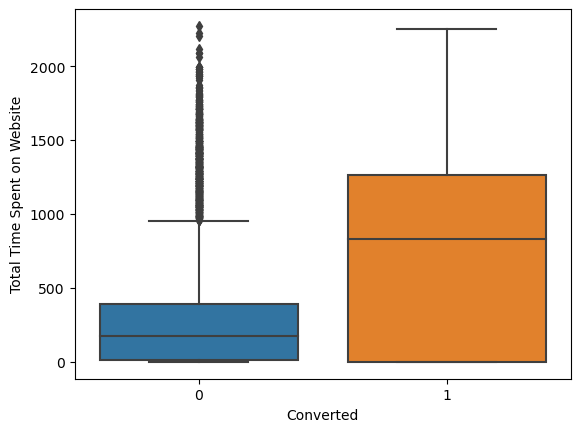

In [127]:
sns.boxplot(y='Total Time Spent on Website',x='Converted', data=Lead_Score )

Conclusion: Total Time spent on website is an important factor to note and the leads converted are spending lot of time on the website. Hence website should be more engaging in order to get high conversion rates.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

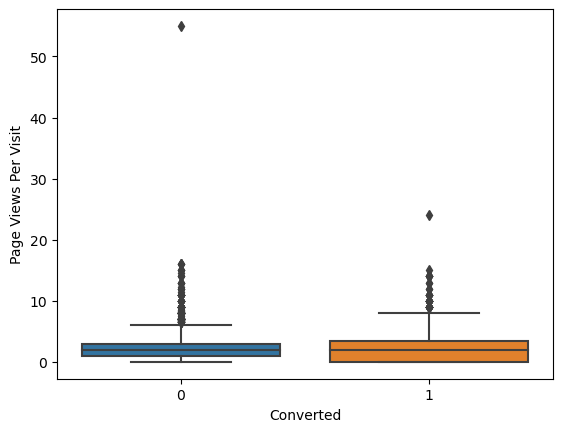

In [128]:
sns.boxplot(y='Page Views Per Visit',x='Converted', data=Lead_Score )

Conclusion: Page views of both Converted and not converted are almost same hence page views are also not an important factor

[]

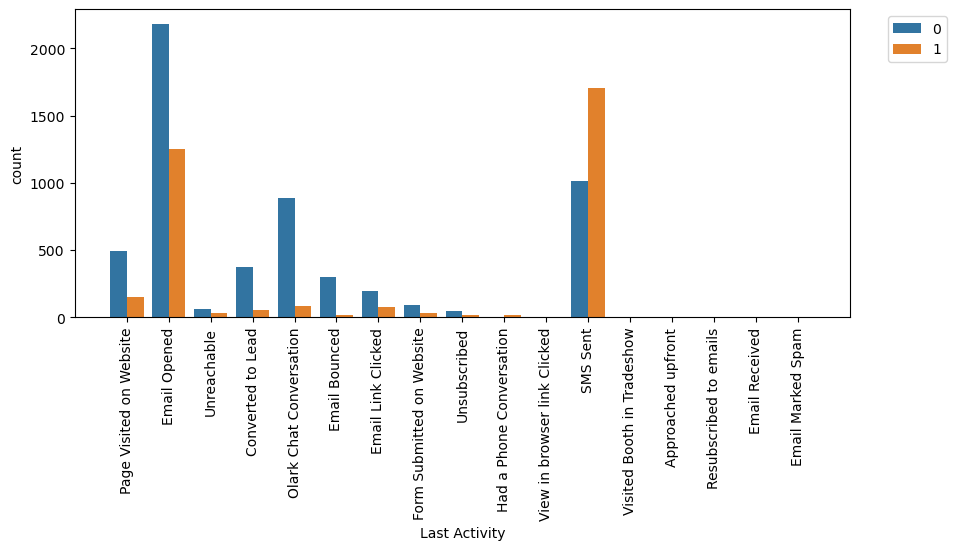

In [129]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Last Activity',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.plot()

In [130]:
Lead_Score['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [131]:
Lead_Score['Last Activity']=Lead_Score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails', 'Email Received', 'Email Marked Spam'],'Other_Activity')

[]

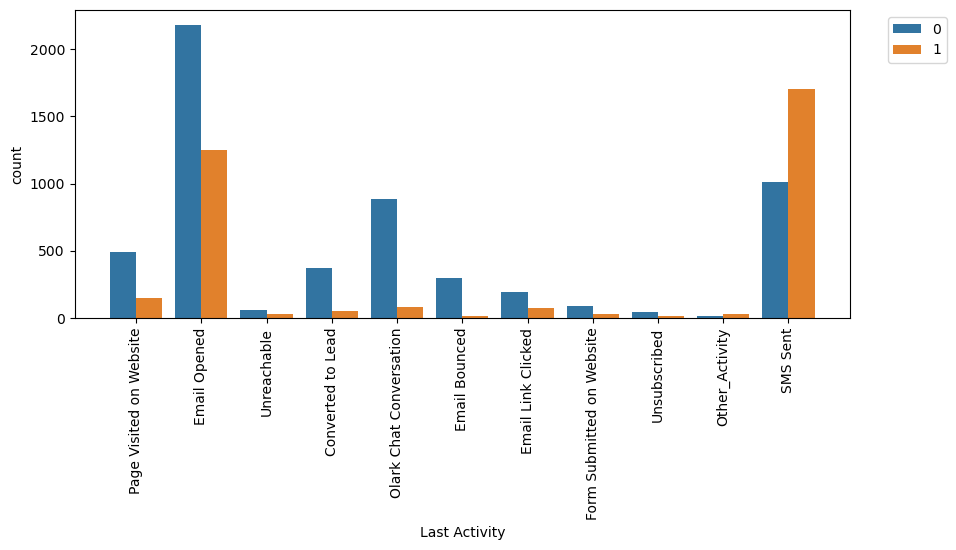

In [132]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Last Activity',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.plot()

1. Coversion rate with last activity as SMS sent has a high conversion rate
2. The last Activity of the leads as Email Opened are more in number. Hence we can focus on email marketing to increase brand awareness and product details. 

In [133]:
Lead_Score['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

More than 95% of the traffic is from India therefore no such inference can be drwan from Country.

In [134]:
Lead_Score['Specialization'].unique()

array(['others', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [135]:
Lead_Score['Specialization']=Lead_Score['Specialization'].replace(['others'],'Other_Specialization')

[]

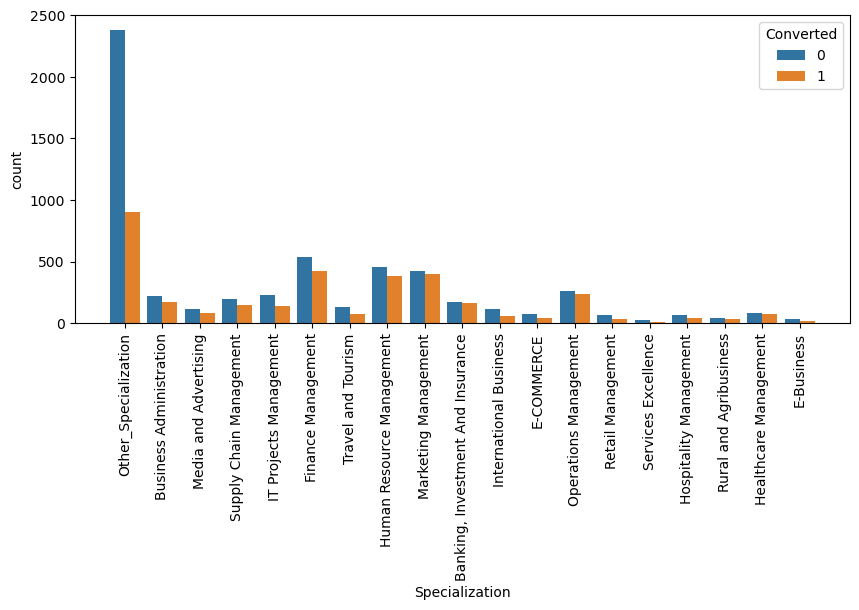

In [136]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Specialization',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

Conclusion: Specialization is an important factor for conversion rate.

[]

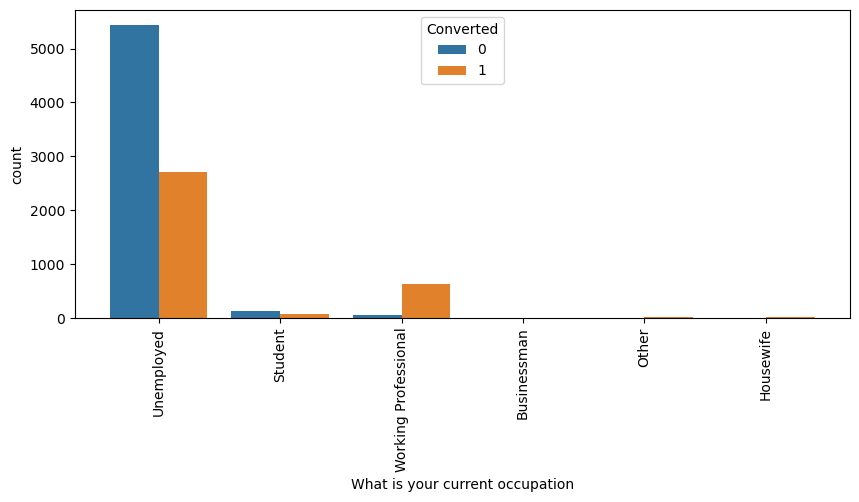

In [137]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='What is your current occupation',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

1. Working Professionals have high conversion rate therefore the focus should be more on converting leads who are working.
2. Unemployed are high in number but the conversion rate is very low, to increase the overall conversion rate we should focus on converting unemployed leads

In [138]:
Lead_Score['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

99% leads wants better career prospect therefore no inference can be drawn as such

In [139]:
Lead_Score['Search'].describe()                                        
        

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [140]:
Lead_Score['Magazine'].describe()  

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [141]:
Lead_Score['Newspaper Article'].describe() 

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [142]:
Lead_Score['Newspaper Article'].describe() 

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [143]:
Lead_Score['X Education Forums'].describe() 

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [144]:
Lead_Score['Newspaper'].describe() 

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [145]:
Lead_Score['Digital Advertisement'].describe() 

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [146]:
Lead_Score['Through Recommendations'].describe() 

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [147]:
Lead_Score['Receive More Updates About Our Courses'].describe() 

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

For below variables all most all the entries are NO therefore no such inference can be drawn.


---


'Search', 'Magazine','Newspaper Article', 'X Education Forums', 
'Newspaper','Digital Advertisement', 'Through Recommendations',
'Receive More Updates About Our Courses'

In [148]:
Lead_Score['Tags'].describe() 

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

[]

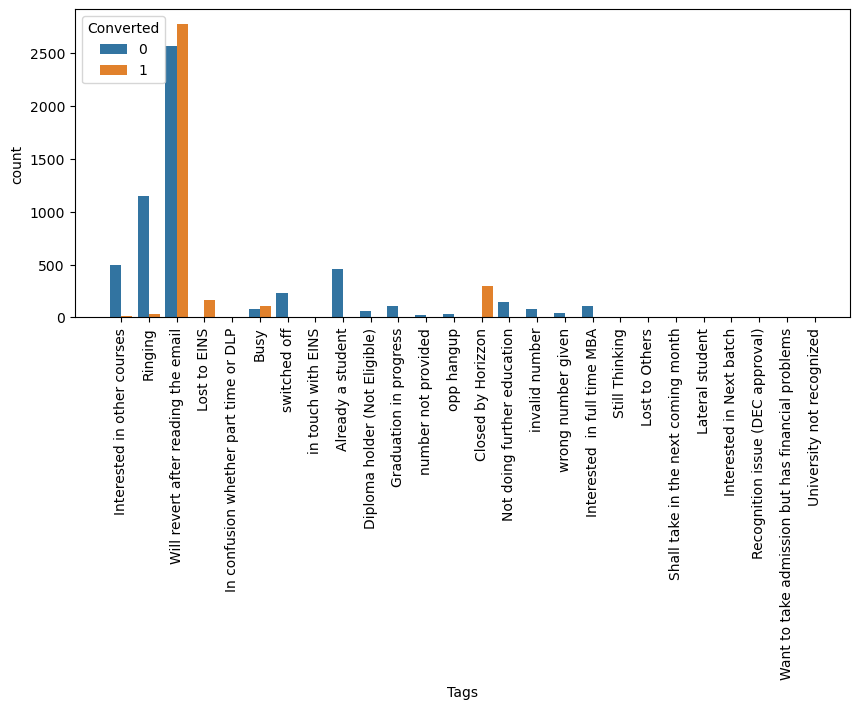

In [149]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Tags',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

In [150]:
print(Lead_Score['Tags'].unique())

['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'number not provided' 'opp hangup'
 'Closed by Horizzon' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


In [151]:
Lead_Score['Tags']=Lead_Score['Tags'].replace(['in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress','opp hangup','Still Thinking','Lost to Others', 'Shall take in the next coming month', 'Lateral student','Interested in Next batch' ,'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'],'Other_tags')

[]

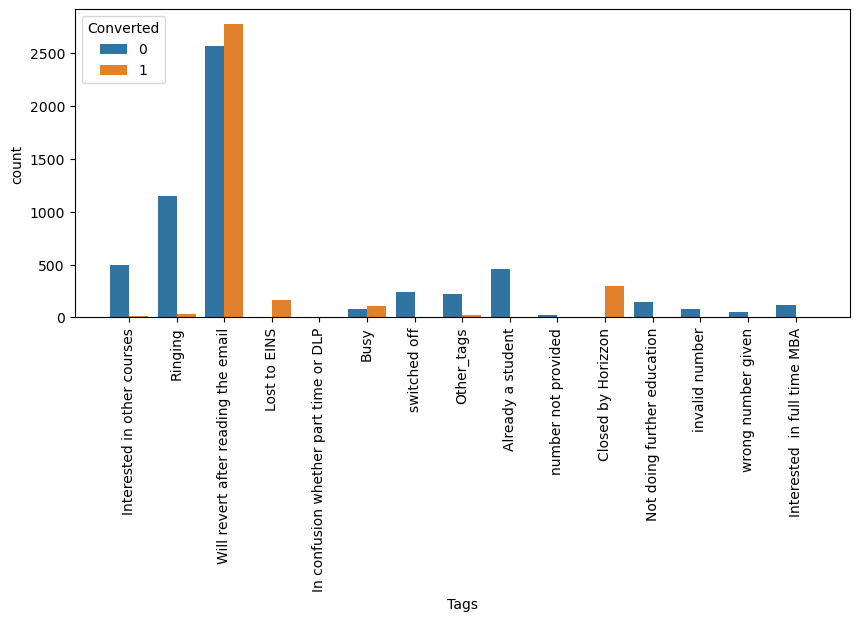

In [152]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Tags',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

[]

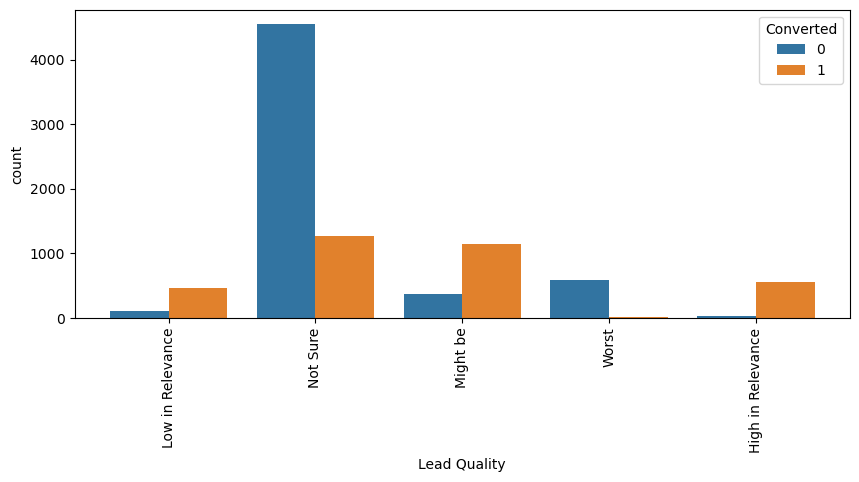

In [153]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Lead Quality',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

Lead quality is an important metric. As it tells the type of lead.

[]

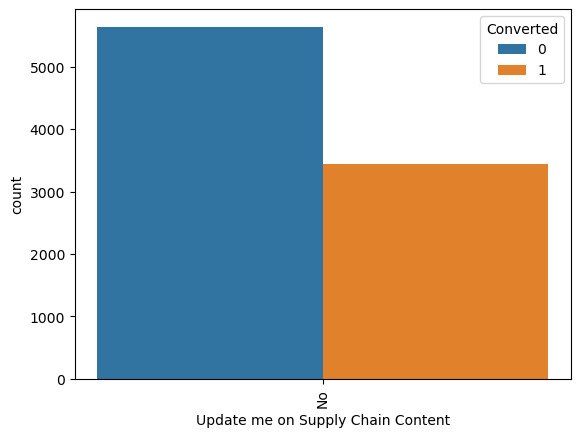

In [154]:
sns.countplot(x= 'Update me on Supply Chain Content',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

In [155]:
Lead_Score.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

[]

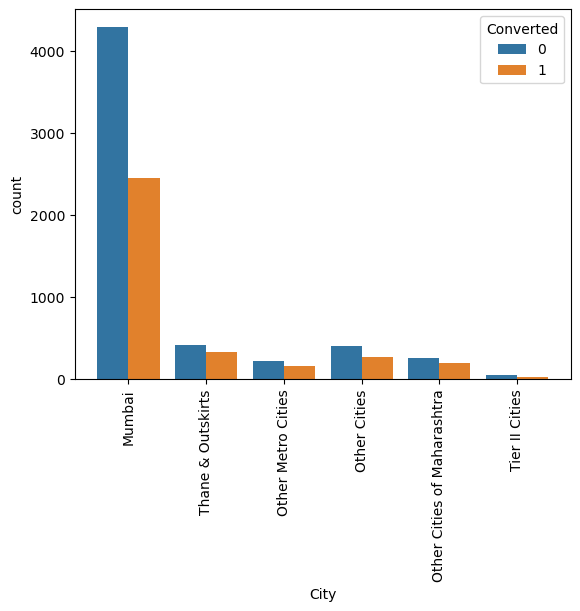

In [156]:
sns.countplot(x= 'City',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.plot()

In [157]:
Lead_Score['City'].describe() 

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

Most leads are from Mumbai but the conversion rate is low.

[]

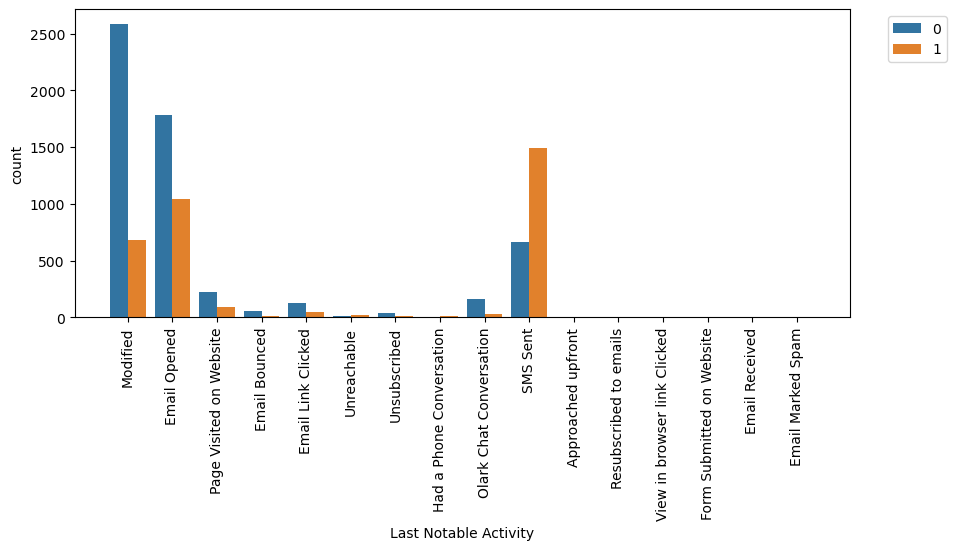

In [158]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Last Notable Activity',hue='Converted', data=Lead_Score)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.plot()

In [159]:
Lead_Score['I agree to pay the amount through cheque'].describe() 

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [160]:
Lead_Score['A free copy of Mastering The Interview'].describe() 

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

A free copy of Mastering The Interview and I agree to pay the amount through cheque have only No. therefore the inference is irrelevant.

# **conclusion**
Based on the Analysis we have seen that many columns are not important for the model and it will not contribute to additional information drop them for further analysis.

In [161]:
Lead_Score=Lead_Score.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [162]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [163]:
Lead_Score.shape

(9074, 16)

## **DATA PREPARATION**

Converting some binary variables (Yes/No) to 0/1

In [164]:
#list of variables to map 
varlist=['Do Not Email', 'Do Not Call']

#defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

#applying the function to varlist
Lead_Score[varlist]=Lead_Score[varlist].apply(binary_map)

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [165]:
#creating dummy variable for some  of the categorical variable and dropping the first one
dummy=pd.get_dummies(Lead_Score[['Lead Origin','Lead Source','Last Activity', 'Specialization', 'Tags','Lead Quality','City', 'What is your current occupation','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [166]:
Lead_Score=pd.concat([Lead_Score,dummy], axis=1)
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Un

In [167]:
Lead_Score=Lead_Score.drop(['Lead Origin','Lead Source','Last Activity', 'Specialization', 'Tags','Lead Quality','City', 'What is your current occupation','Last Notable Activity'], axis=1)

In [168]:
Lead_Score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [169]:
Lead_Score.shape

(9074, 88)

In [178]:
Lead_Score = Lead_Score.drop(['Do Not Call'],1)

Lead_Score.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Train and Test 

In [180]:
# Putting feature variable to X
X = Lead_Score.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = Lead_Score['Converted']

print(y)

X.head()


0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [182]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [183]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [186]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [189]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [190]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = Lead_Score.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
Lead Origin_Lead Import                Lead Source_Other_Sources                        0.744366
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [192]:
# Dropping highly correlated features

X_test = X_test.drop(['Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [193]:
conv_corr = X_train.corr()

In [194]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.756104
Lead Origin_Lead Import       Lead Source_Other_Sources                         0.754853
Do Not Email                  Last Activity_Email Bounced                       0.624939
Last Activity_Other_Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat        Specialization_Other_Specialization               0.505771
Page Views Per Visit          Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
dtype: float64

# MODEL BUILDING

In [196]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [197]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.8
Date:                Sun, 26 Feb 2023   Deviance:                       2547.6
Time:                        22:09:33   Pearson chi2:                 3.48e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9389      1.760      1.101      0.271      -1.512       5.389
Do Not Email                                            -1.3742      0.319     -4.311      0.000      -1.999      -0.749
TotalVisits                                              0.0669      0.085      0.784      0.433      -0.100       0.234
Total Time Spent on Website                              1.1449      0.063     18.065      0.000       1.021       1.269
Page Views Per Visit                                    -0.1232      0.085     -1.452      0.147      -0.289       0.043
Lead Origin_Landing Page Submission                     -1.0222      0.218     -4.693      0.000      -1.449      -0.595
Lead Origin_Lead Add Form                                0.0616      1.281      0.048      0.962      -2.450       2.573
Lead Origin_Lead Import                                  0.8743      1.157      0.755      0.450      -1.394       3.143
Lead Source_Google                                       0.1604      0.152      1.055      0.292      -0.138       0.459
Lead Source_Olark Chat                                   0.9612      0.227      4.234      0.000       0.516       1.406
Lead Source_Organic Search                               0.1608      0.207      0.777      0.437      -0.245       0.566
Lead Source_Other_Sources                                0.2589      0.847      0.306      0.760      -1.402       1.920
Lead Source_Reference                                    1.3686      1.340      1.022      0.307      -1.257       3.994
Lead Source_Referral Sites                              -0.1403      0.490     -0.286      0.775      -1.101       0.820
Lead Source_Welingak Website                             5.0877      1.483      3.431      0.001       2.181       7.994
Last Activity_Email Bounced                             -0.5906      0.880     -0.671      0.502      -2.315       1.134
Last Activity_Email Link Clicked                        -0.8444      0.458     -1.843      0.065      -1.742       0.054
Last Activity_Email Opened                              -0.4409      0.347     -1.270      0.204      -1.122       0.240
Last Activity_Form Submitted on Website                  0.1463      0.589      0.248      0.804      -1.009       1.302
Last Activity_Olark Chat Conversation                   -0.5643      0.392     -1.439      0.150      -1.333       0.204
Last Activity_Other_Activity                             1.4505      1.187      1.222      0.222      -0.875       3.776
Last Activity_Page Visited on Website                   -0.4220      0.401     -1.051      0.293      -1.209       0.365
Last Activity_SMS Sent                                   1

In [205]:
#feature selection using RFE
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features


logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 55),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Other_Sources', False, 46),
 ('Lead Source_Reference', False, 63),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 53),
 ('Last Activity_Olark Chat Conversation', False, 22),
 ('Last Activity_Other_Activity', False, 7),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 12),
 ('

In [206]:
col = X_train.columns[rfe.support_]

In [208]:
#Assessing the model with stasmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.1
Date:                Sun, 26 Feb 2023   Deviance:                       3130.2
Time:                        22:20:42   Pearson chi2:                 2.86e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5684
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8756      0.216     -4.060      0.000      -1.298      -0.453
Lead Source_Welingak Website                      4.0516      0.736      5.504      0.000       2.609       5.494
Last Activity_SMS Sent                            1.9681      0.102     19.284      0.000       1.768       2.168
Tags_Busy                                         3.3326      0.324     10.280      0.000       2.697       3.968
Tags_Closed by Horizzon                           8.5050      0.771     11.036      0.000       6.994      10.015
Tags_Lost to EINS                                 9.3184      0.764     12.198      0.000       7.821      10.816
Tags_Ringing                                     -2.1963      0.333     -6.602      0.000      -2.848      -1.544
Tags_Will revert after reading the email          3.5132      0.231     15.239      0.000       3.061       3.965
Tags_invalid number                             -23.6821   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_number not provided                        -24.4491   3.81e+04     -0.001      0.999   -7.46e+04    7.46e+04
Tags_switched off                                -2.8670      0.582     -4.923      0.000      -4.008      -1.726
Tags_wrong number given                         -23.2500    3.2e+04     -0.001      0.999   -6.28e+04    6.28e+04
Lead Quality_Not Sure                            -3.5854      0.129    -27.719      0.000      -3.839      -3.332
Lead Quality_Worst                               -4.1221      0.809     -5.095      0.000      -5.708      -2.536
Last Notable Activity_Modified                   -1.7816      0.106    -16.735      0.000      -1.990      -1.573
Last Notable Activity_Olark Chat Conversation    -1.3183      0.353     -3.736      0.000      -2.010      -0.627
=================================================================================================================
"""

In [209]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.279325
1012    0.279325
9226    0.001546
4750    0.735036
7987    0.993593
1281    0.990105
2880    0.279325
4971    0.698405
7536    0.933245
1248    0.001546
dtype: float64

In [210]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27932542, 0.27932542, 0.00154555, 0.73503627, 0.99359282,
       0.99010492, 0.27932542, 0.69840533, 0.93324484, 0.00154555])

In [212]:
#Creating df with predicted probabilities 
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.279325,3009
1,0,0.279325,1012
2,0,0.001546,9226
3,1,0.735036,4750
4,1,0.993593,7987


In [213]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.279325,3009,0
1,0,0.279325,1012,0
2,0,0.001546,9226,0
3,1,0.735036,4750,1
4,1,0.993593,7987,1


In [214]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9214296961108487


# Checking VIF's

In [215]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
2                                       Tags_Busy                       1.11
9                               Tags_switched off                       1.10
3                         Tags_Closed by Horizzon                       1.06
0                    Lead Source_Welingak Website                       1.05
4                               Tags_Lost to EINS                       1.05
14  Last Notable Activity_Olark Chat Conversation                       1.05
7                             Tags_invalid number                       1.03
10                        Tags_wrong number given                       1.02
8                        Tags_number not provided                       1.01
12                             Lead Quality_Worst                       0.40
13                 Last Notable Activity_Modified                       0.17
11                          Lead Quality_Not Sure                       0.15

In [216]:
col = col.drop('Tags_invalid number')
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [217]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1572.2
Date:                Sun, 26 Feb 2023   Deviance:                       3144.4
Time:                        22:25:24   Pearson chi2:                 2.82e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5674
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0671      0.216     -4.934      0.000      -1.491      -0.643
Lead Source_Welingak Website                      4.0487      0.736      5.505      0.000       2.607       5.490
Last Activity_SMS Sent                            1.9369      0.101     19.129      0.000       1.738       2.135
Tags_Busy                                         3.5377      0.323     10.955      0.000       2.905       4.171
Tags_Closed by Horizzon                           8.6797      0.771     11.257      0.000       7.169      10.191
Tags_Lost to EINS                                 9.4916      0.764     12.417      0.000       7.993      10.990
Tags_Ringing                                     -1.9798      0.331     -5.983      0.000      -2.628      -1.331
Tags_Will revert after reading the email          3.7052      0.231     16.049      0.000       3.253       4.158
Tags_number not provided                        -23.2342   2.31e+04     -0.001      0.999   -4.54e+04    4.53e+04
Tags_switched off                                -2.6464      0.581     -4.554      0.000      -3.785      -1.507
Tags_wrong number given                         -22.0374   1.95e+04     -0.001      0.999   -3.82e+04    3.81e+04
Lead Quality_Not Sure                            -3.5792      0.129    -27.738      0.000      -3.832      -3.326
Lead Quality_Worst                               -4.1099      0.811     -5.069      0.000      -5.699      -2.521
Last Notable Activity_Modified                   -1.7668      0.106    -16.642      0.000      -1.975      -1.559
Last Notable Activity_Olark Chat Conversation    -1.3214      0.353     -3.746      0.000      -2.013      -0.630
=================================================================================================================
"""

In [218]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.280665,3009,0
1,0,0.280665,1012,0
2,0,0.001569,9226,0
3,1,0.730223,4750,1
4,1,0.993409,7987,1


In [219]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9207998740355849


In [221]:
#Checking VIF's again
calculate_vif(X_train[col])

                                         Features  Variance Inflation Factor
2                                       Tags_Busy                       1.11
8                               Tags_switched off                       1.09
3                         Tags_Closed by Horizzon                       1.06
4                               Tags_Lost to EINS                       1.05
13  Last Notable Activity_Olark Chat Conversation                       1.05
0                    Lead Source_Welingak Website                       1.04
9                         Tags_wrong number given                       1.02
7                        Tags_number not provided                       1.01
11                             Lead Quality_Worst                       0.40
12                 Last Notable Activity_Modified                       0.17
10                          Lead Quality_Not Sure                       0.15
1                          Last Activity_SMS Sent                       0.14

# The above model is now stable as the VIF values and p-values are good

In [222]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [223]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3755  150]
 [ 353 2093]]
Accuracy : 0.9207998740355849
Sensitivity : 0.8556827473426002
Specificity : 0.9615877080665813
Precision : 0.9331252786446723


(0.9207998740355849,
 0.8556827473426002,
 0.9615877080665813,
 0.9331252786446723)

# Plotting ROC curve

In [224]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [225]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

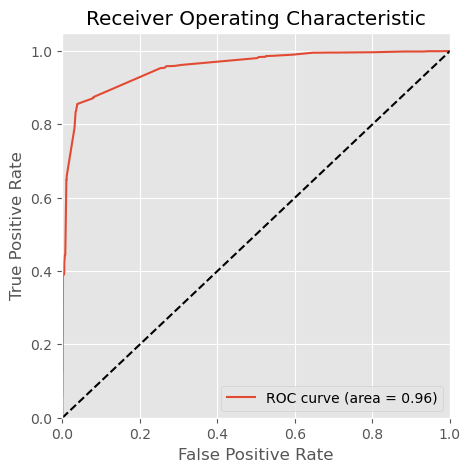

In [226]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [227]:
#finding optimal values of the cut-off
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.280665,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.280665,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001569,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.730223,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993409,7987,1,1,1,1,1,1,1,1,1,1,1


In [228]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.806487,0.959526,0.710627,0.675007
0.2,0.2,0.810109,0.959117,0.716773,0.679606
0.3,0.3,0.903007,0.870401,0.923431,0.876853
0.4,0.4,0.920800,0.855683,0.961588,0.933125
0.5,0.5,0.920800,0.855683,0.961588,0.933125
0.6,0.6,0.920800,0.855683,0.961588,0.933125
0.7,0.7,0.915761,0.837694,0.964661,0.936900
0.8,0.8,0.860494,0.655356,0.988988,0.973876
0.9,0.9,0.860494,0.655356,0.988988,0.973876


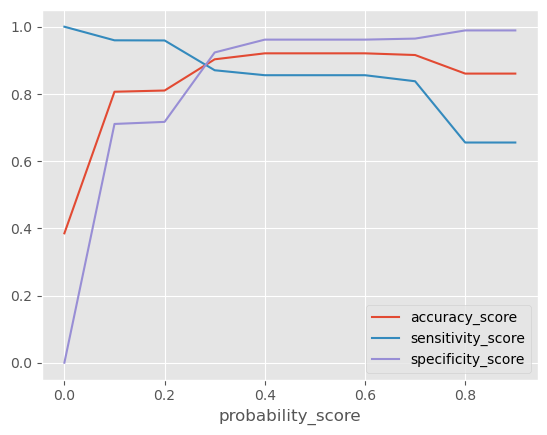

In [229]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

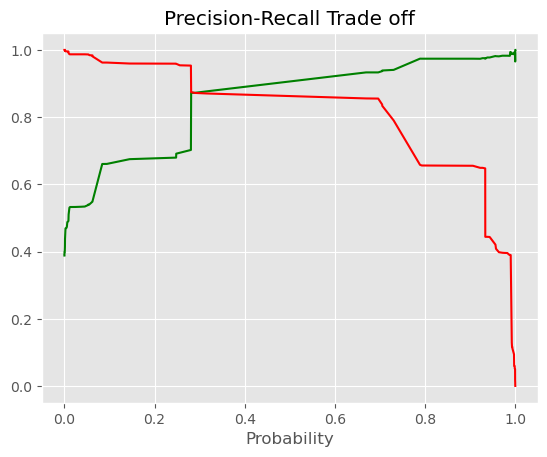

In [231]:
#Precision-Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

Comment:

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [232]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.280665,3009,1,28
1,0,0.280665,1012,1,28
2,0,0.001569,9226,0,0
3,1,0.730223,4750,1,73
4,1,0.993409,7987,1,99


In [233]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[2917  988]
 [ 114 2332]]
Accuracy : 0.8264840182648402
Sensitivity : 0.9533932951757972
Specificity : 0.7469910371318822
Precision : 0.7024096385542169


(0.8264840182648402,
 0.9533932951757972,
 0.7469910371318822,
 0.7024096385542169)

In [234]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.280665,1,28
1,1,1490,0.933272,1,93
2,0,7936,0.280665,1,28
3,1,4216,0.997116,1,100
4,0,3830,0.280665,1,28


In [235]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1275  459]
 [  62  927]]
Accuracy : 0.808666911494675
Sensitivity : 0.9373104145601617
Specificity : 0.7352941176470589
Precision : 0.6688311688311688


(0.808666911494675, 0.9373104145601617, 0.7352941176470589, 0.6688311688311688)

# Final model

In [236]:
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [237]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.280665                  1          28
1         1012          0             0.280665                  1          28
2         9226          0             0.001569                  0           0
3         4750          1             0.730223                  1          73
4         7987          1             0.993409                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.280665                  1          28
1         1490          1             0.933272                  1          93
2         7936          0             0.280665                  1          28
3         4216          1             0.997116                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.280665,1,28
1,1490,1,0.933272,1,93
2,7936,0,0.280665,1,28
3,4216,1,0.997116,1,100
4,3830,0,0.280665,1,28
...,...,...,...,...,...
2718,850,0,0.062508,0,6
2719,2879,0,0.001637,0,0
2720,6501,1,0.989799,1,99
2721,7155,0,0.062508,0,6


In [238]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                            -1.067148
Lead Source_Welingak Website                      4.048720
Last Activity_SMS Sent                            1.936921
Tags_Busy                                         3.537654
Tags_Closed by Horizzon                           8.679699
Tags_Lost to EINS                                 9.491622
Tags_Ringing                                     -1.979840
Tags_Will revert after reading the email    